In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf

In [3]:
df = pd.read_csv('/content/drive/MyDrive/SPAM text message 20170820 - Data.csv')

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
# Rename columns for better understanding
df = df[['Category', 'Message']]
df.columns = ['label', 'message']

In [8]:
# Encode labels (ham=0, spam=1)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

In [9]:
# Split the data into features (X) and target labels (y)
X = df['message']
y = df['label']

In [10]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Convert text to numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

In [12]:
# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train_tfidf.shape[1],)),  # Input layer
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer 1
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer 2
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │         320,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,177 (1.23 MB)

 Trainable params: 322,177 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the model
history = model.fit(X_train_tfidf, y_train, epochs=5, batch_size=32, validation_data=(X_test_tfidf, y_test))

Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7916 - loss: 0.5641 - val_accuracy: 0.9740 - val_loss: 0.1278
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9812 - loss: 0.0750 - val_accuracy: 0.9910 - val_loss: 0.0481
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9917 - loss: 0.0250 - val_accuracy: 0.9910 - val_loss: 0.0441
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9989 - loss: 0.0077 - val_accuracy: 0.9928 - val_loss: 0.0448
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9989 - loss: 0.0045 - val_accuracy: 0.9919 - val_loss: 0.0458


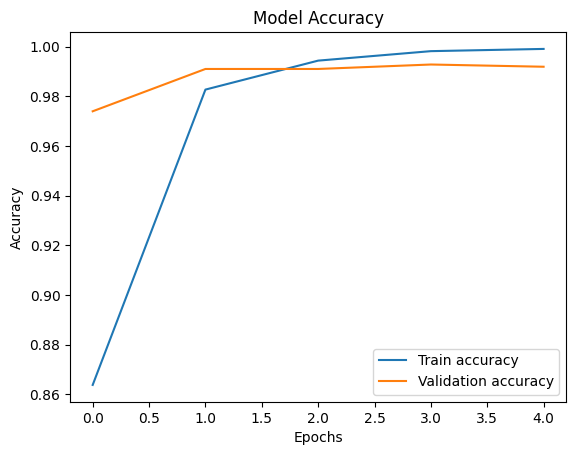

In [16]:
# Plot the training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_tfidf, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9899 - loss: 0.0506
Test Accuracy: 99.19%


In [18]:
# Predict function
def predict_spam(message):
    message_tfidf = vectorizer.transform([message]).toarray()  # Convert message to tf-idf
    prediction = model.predict(message_tfidf)
    return 'Spam' if prediction >= 0.5 else 'Ham'

# Example usage
new_message = "Congratulations, you've won a free prize!"
prediction = predict_spam(new_message)
print(f"The message is: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
The message is: Spam
